In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [62]:
source('../parameters.sh')
source('parameters.sh')


In [5]:
devtools::load_all(multiSnpnet_src_d)

Loading multiSnpnet



In [8]:
load(file.path(RData_d, RData_path))

In [9]:
ls()

[1] "A_init"            "active"            "AUC_train"        
 [4] "AUC_val"           "B_init"            "configs"          
 [7] "current_active"    "feature_names"     "fit"              
[10] "ilam"              "metric_train"      "metric_val"       
[13] "multiSnpnet_src_d" "nactive"           "norm_prod"        
[16] "p.factor"          "RData_d"           "RData_path"       
[19] "W_init"            "weight"

In [10]:
names(fit)

[1] "B"          "A"          "C"          "a0"         "W"         
 [6] "obj_values" "message"    "niter"      "response"   "A_niter"   
[11] "residuals"  "stats"      "std_obj"    "weight"

In [20]:
plot_biplot(
    svd(t(as.matrix(fit$C))),
    label=list(
      'phenotype'=colnames(fit$C), # we should update this phenotype labels so that it matches with the simple example above.
      'variant'=rownames(fit$C)
    ),
    use_ggrepel=TRUE
) -> p_biplot

In [75]:
ggsave(
    'biplot.png',
    p_biplot +
    theme_bw(base_size=16) 
)

Saving 6.67 x 6.67 in image



In [76]:
ggsave(
    'biplot.pdf',
    p_biplot +
    theme_bw(base_size=16) 
)

Saving 6.67 x 6.67 in image



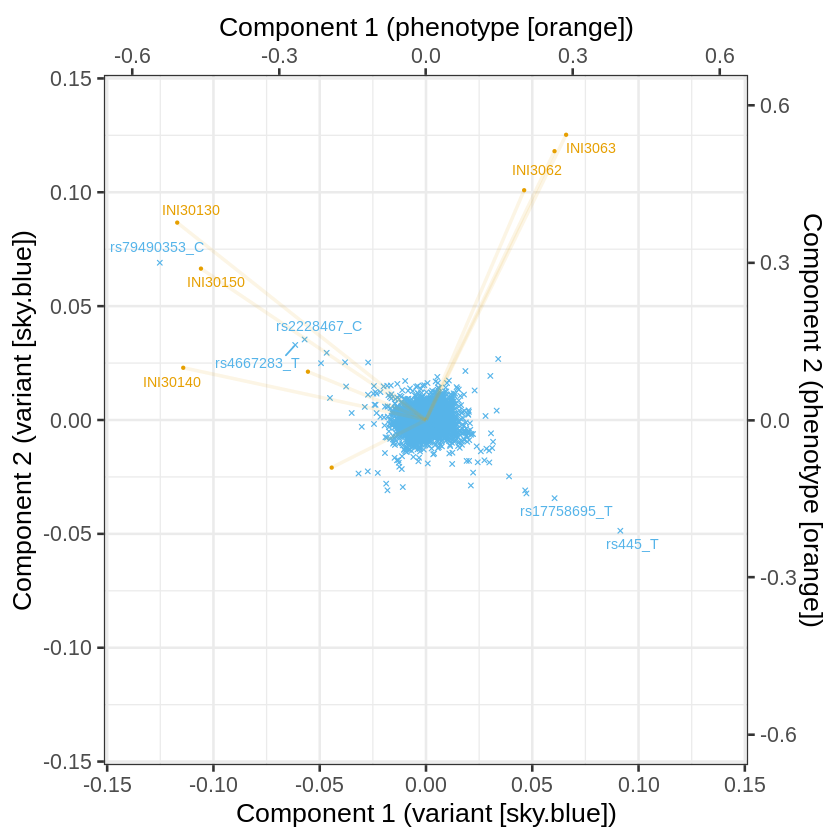

In [21]:
p_biplot +
theme_bw(base_size=16)

In [29]:
var_annot_f %>%
fread(colClasses = c('#CHROM'='character')) %>%
rename('CHROM'='#CHROM') -> var_annot_df


In [11]:
dim(fit$C)

[1] 21843     8

In [39]:
svd_C <- svd(t(as.matrix(fit$C)))


In [40]:
svd_C %>% names()

[1] "d" "u" "v"

In [43]:
svd_C$u %>% dim() %>% print()
svd_C$d %>% length() %>% print()
svd_C$v %>% dim() %>% print()

[1] 8 8
[1] 8
[1] 21843     8


In [45]:
svd_C$v -> svd_V
colnames(svd_V) <- paste0('Component', 1:ncol(svd_V))
rownames(svd_V) <- rownames(fit$C)


In [69]:
var_annot_df %>%
mutate(ID_ALT = paste(ID, ALT, sep='_')) %>%
inner_join(
    cbind(fit$C, svd_V) %>%
    as.data.frame() %>%
    rownames_to_column('ID_ALT'),
    by='ID_ALT'
) -> dff


In [71]:
dff %>% dim()

[1] 21843    45

In [70]:
dff %>% colnames()

[1] "CHROM"                 "POS"                   "ID"                   
 [4] "REF"                   "ALT"                   "FILTER"               
 [7] "POS_total"             "Allele"                "Csq"                  
[10] "Consequence"           "SYMBOL"                "Gene"                 
[13] "ld_indep"              "geno_data_source"      "array"                
[16] "CNV_POS_s"             "CNV_POS_e"             "UKB_white_british_MAF"
[19] "hwe_p"                 "mgi_notes"             "f_miss"               
[22] "f_miss_UKBB"           "f_miss_UKBL"           "LoF"                  
[25] "LoF_filter"            "LoF_flags"             "LoF_info"             
[28] "HGVSp"                 "ID_ALT"                "INI30130"             
[31] "INI30140"              "INI30150"              "INI30160"             
[34] "INI3062"               "INI3064"               "INI3063"              
[37] "HC382"                 "Component1"            "Component2"           
[40] "Component3"            "Component4"            "Component5"           
[43] "Component6"            "Component7"            "Component8"

In [72]:
out_f <- file.path(data_d, str_replace(RData_path, '.RData', ''), variant_weights_f)

In [73]:
out_f

[1] "/oak/stanford/groups/mrivas/projects/biobank-methods-dev/20210422_SRRR/Asthma/results_rank_5/output_lambda_67/variant_weights.tsv"

In [74]:
dff %>% 
rename('#CHROM' = 'CHROM') %>%
fwrite(out_f, sep='\t', na = "NA", quote=F)
